In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("max_colwidth", 200)

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import ElasticNet
from numpy import arange
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn import preprocessing

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SequentialFeatureSelector

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import matplotlib.pyplot as plt
import statistics

import seaborn as sns

In [2]:
BasicBox = pd.read_csv('../Model Comparison/Combo.csv')

In [3]:
BasicBox

,MLR,Ridge,Ridge(Alpha),Lasso,Lasso(Alpha),ElasticNet(A=1),RF No Bootstrap,RF With Bootstrap,Gradient Boost,Xtreme Boost
0,0.918063,0.922324,0.872675,0.922000,0.917257,0.900951,0.802505,0.887632,0.887317,0.892172
1,0.921468,0.904080,0.833784,0.870393,0.918043,0.897153,0.812802,0.887489,0.903090,0.893983
2,0.917458,0.873341,0.913389,0.904947,0.834550,0.893508,0.804253,0.862341,0.920209,0.876358
3,0.901348,0.927122,0.915791,0.935329,0.821591,0.858141,0.788075,0.894374,0.918222,0.825427
4,0.880215,0.927237,0.922588,0.923573,0.924398,0.861584,0.798382,0.875895,0.836273,0.880499
...,...,...,...,...,...,...,...,...,...,...
95,NaN,0.925941,0.865711,0.920464,0.894337,0.889731,0.728658,0.898318,0.855921,0.911735
96,NaN,0.891703,0.825523,0.865681,0.881202,0.904851,0.832974,0.857231,0.927833,0.905428
97,NaN,0.928015,0.850263,0.921771,0.883672,0.845491,0.722284,0.895881,0.915311,0.914559
98,NaN,0.908410,0.921203,0.854886,0.923469,0.894342,0.816047,0.861978,0.862950,0.909119


In [4]:
R_GB = pd.read_csv('../Ensemble(R+GB)/Ensemble_R_GB_Scores.csv')

In [5]:
R_GB

,Ensemble: Ridge + GB
0,0.895612
1,0.912427
2,0.943619
3,0.941549
4,0.901311
...,...
95,0.934464
96,0.951516
97,0.944414
98,0.948116


In [6]:
R_XGB = pd.read_csv('../Ensemble(R+XGB)/Ensemble_R_XGB_Scores.csv')

In [7]:
R_XGB

,Ensemble: Ridge + XGB
0,0.952341
1,0.938427
2,0.934531
3,0.944596
4,0.939960
...,...
95,0.942727
96,0.936885
97,0.931192
98,0.908715


In [8]:
L_GB = pd.read_csv('../Ensemble(L+GB)/Ensemble_L_GB_Scores.csv')

In [9]:
L_XGB = pd.read_csv('../Ensemble(L+XGB)/Ensemble_L_XGB_Scores.csv')

In [10]:
E_GB = pd.read_csv('../Ensemble(E+GB)/Ensemble_E_GB_Scores.csv')

In [11]:
E_XGB = pd.read_csv('../Ensemble(E+XGB)/Ensemble_E_XGB_Scores.csv')

In [12]:
ensemble = pd.concat([R_GB, R_XGB, L_GB, L_XGB, E_GB, E_XGB])

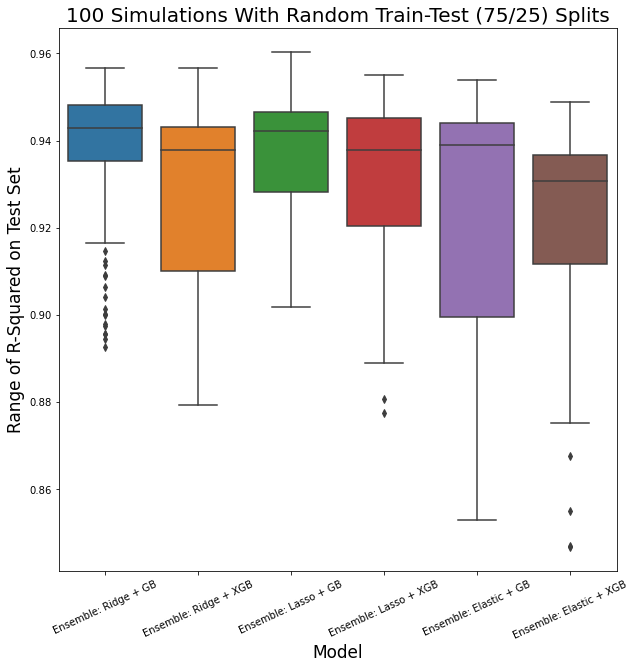

In [13]:
plt.figure(figsize=(10,10))
plt.title('100 Simulations With Random Train-Test (75/25) Splits', fontsize=20)
plt.ylabel('Range of R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=ensemble)
plt.xticks(rotation=25);

In [14]:
combo = pd.concat([BasicBox, R_GB, R_XGB, L_GB, L_XGB, E_GB, E_XGB])

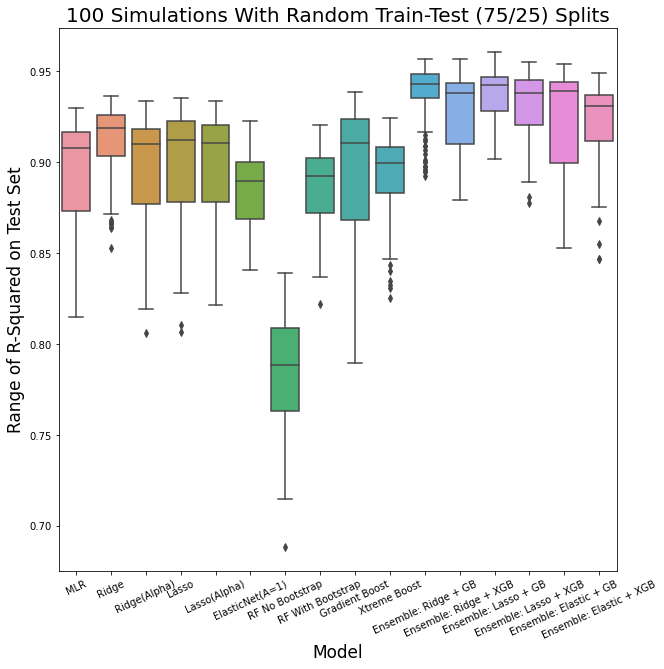

In [15]:
plt.figure(figsize=(10,10))
plt.title('100 Simulations With Random Train-Test (75/25) Splits', fontsize=20)
plt.ylabel('Range of R-Squared on Test Set', fontsize=17)
plt.xlabel('Model', fontsize=17)
sns.boxplot(data=combo)
plt.xticks(rotation=25);